In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# CARGA DE DATOS: Ajustado al nombre físico real
path = '../data/processed/df_maestro_unificado.csv'

try:
    df_maestro = pd.read_csv(path)
    # Aseguramos el tipo de dato temporal
    df_maestro['Fecha_Actividad'] = pd.to_datetime(df_maestro['Fecha_Actividad'])
    print(f"✅ Dataset cargado. Registros: {len(df_maestro)}")
except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo en {path}")

✅ Dataset cargado. Registros: 11600


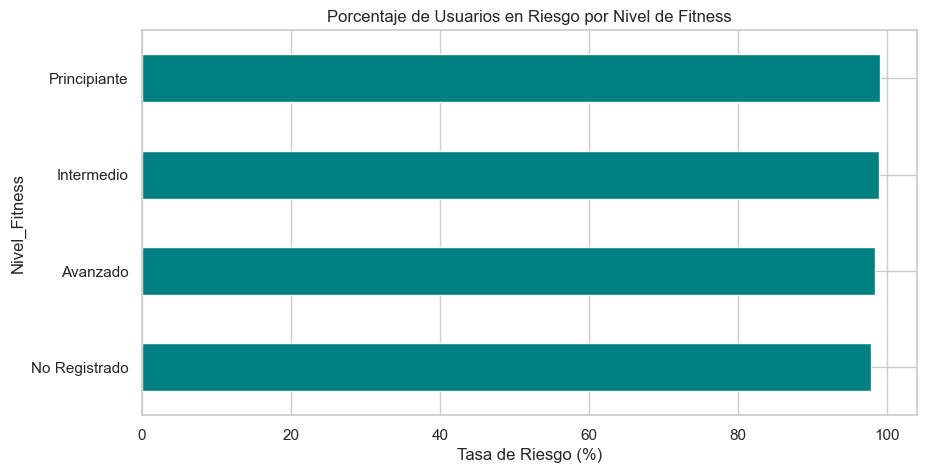

Tasa de Riesgo detallada:
Nivel_Fitness
No Registrado    97.800776
Avanzado         98.404255
Intermedio       98.841699
Principiante     98.993711
Name: En_Riesgo, dtype: float64


In [4]:
# Análisis de Riesgo por Nivel de Fitness
fitness_risk = df_maestro.groupby('Nivel_Fitness')['En_Riesgo'].mean().sort_values() * 100

plt.figure(figsize=(10, 5))
fitness_risk.plot(kind='barh', color='teal')
plt.title('Porcentaje de Usuarios en Riesgo por Nivel de Fitness')
plt.xlabel('Tasa de Riesgo (%)')
plt.show()

print("Tasa de Riesgo detallada:")
print(fitness_risk)

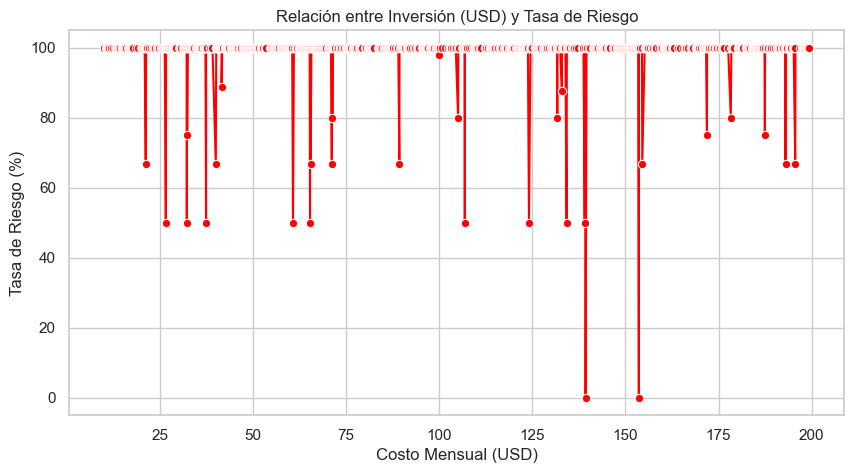

Tasa de Riesgo por Costo:
Costo_Suscripcion_USD
139.31      0.0
153.61      0.0
139.07     50.0
134.22     50.0
124.12     50.0
          ...  
198.79    100.0
198.97    100.0
198.99    100.0
199.29    100.0
10.18     100.0
Name: En_Riesgo, Length: 971, dtype: float64


In [5]:
# 1. Análisis de Riesgo por Costo de Suscripción (Segmentación por Valor)
costo_riesgo = df_maestro.groupby('Costo_Suscripcion_USD')['En_Riesgo'].mean().sort_values() * 100

plt.figure(figsize=(10, 5))
sns.lineplot(x=costo_riesgo.index, y=costo_riesgo.values, marker='o', color='red')
plt.title('Relación entre Inversión (USD) y Tasa de Riesgo')
plt.ylabel('Tasa de Riesgo (%)')
plt.xlabel('Costo Mensual (USD)')
plt.show()

print("Tasa de Riesgo por Costo:")
print(costo_riesgo)

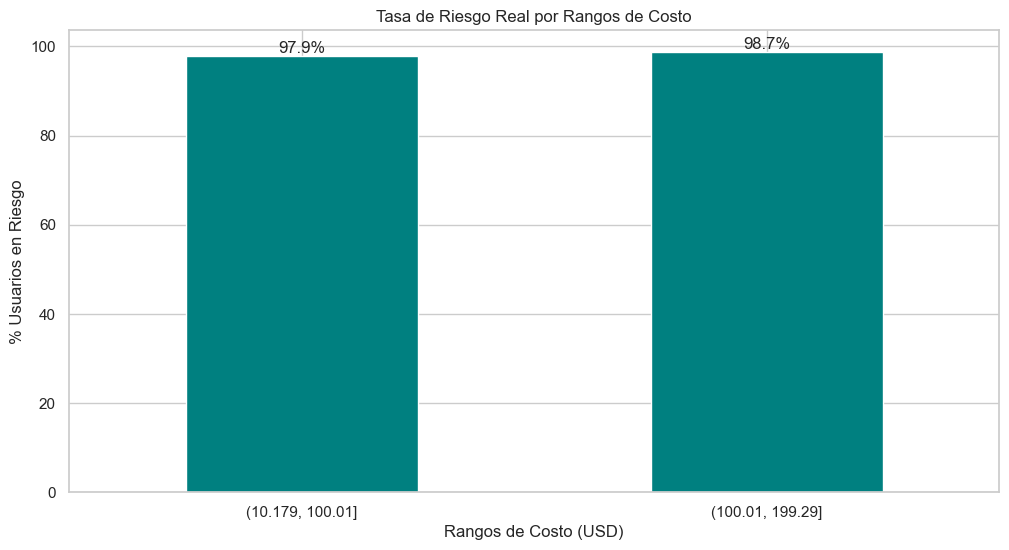

Tasa de Riesgo por Segmento de Precio:
Segmento_Precio
(10.179, 100.01]    97.912277
(100.01, 199.29]    98.704663
Name: En_Riesgo, dtype: float64


In [7]:
# 1. Creamos los grupos de costo manejando los valores duplicados
df_maestro['Segmento_Precio'] = pd.qcut(
    df_maestro['Costo_Suscripcion_USD'], 
    q=5, 
    duplicates='drop'
)

# 2. Calculamos el riesgo por segmento
analisis_precio = df_maestro.groupby('Segmento_Precio', observed=True)['En_Riesgo'].mean() * 100

# 3. Gráfico de barras
plt.figure(figsize=(12, 6))
ax = analisis_precio.plot(kind='bar', color='teal')
plt.title('Tasa de Riesgo Real por Rangos de Costo')
plt.ylabel('% Usuarios en Riesgo')
plt.xlabel('Rangos de Costo (USD)')
plt.xticks(rotation=0)

# Añadimos etiquetas de valor sobre las barras para mayor claridad
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

print("Tasa de Riesgo por Segmento de Precio:")
print(analisis_precio)


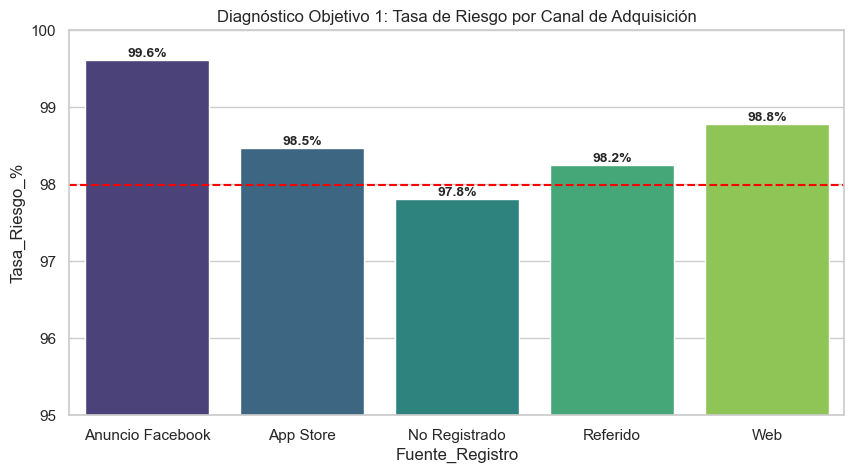

In [9]:
# Análisis de Riesgo por Fuente de Registro (Versión optimizada)
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=fuente_stats, 
    x='Fuente_Registro', 
    y='Tasa_Riesgo_%', 
    hue='Fuente_Registro', 
    palette='viridis', 
    legend=False
)

plt.axhline(y=df_maestro['En_Riesgo'].mean() * 100, color='red', linestyle='--', label='Promedio General')
plt.title('Diagnóstico Objetivo 1: Tasa de Riesgo por Canal de Adquisición')
plt.ylim(95, 100)

# Anotaciones técnicas
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()